### Classifiers

In [2]:
from data_processing import *

In [3]:
csv = 'features.csv'
d = data_clean(csv)

In [4]:
df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv)
X_train, X_test, y_train, y_test = d.index(csv)

X = num_scale

In [5]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', '('fixed acidity', 'citric acid')',
       '('fixed acidity', 'chlorides')',
       '('volatile acidity', 'residual sugar')', 'fixed acidity_citric acid',
       'fixed acidity_chlorides', 'volatile acidity_residual sugar',
       'citric acid_free sulfur dioxide', 'residual sugar_chlorides',
       'residual sugar_total sulfur dioxide', 'chlorides_density',
       'chlorides_sulphates', 'free sulfur dioxide_sulphates',
       'total sulfur dioxide_sulphates', 'density_pH'],
      dtype='object')

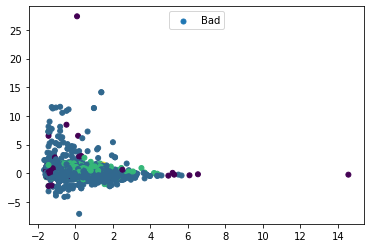

In [6]:
import matplotlib.pyplot as plt
labels = ['f_acidity','v_acidity']
plt.scatter(X.iloc[:, 5], X.iloc[:, 20], s=25, c=df_mm.cat)
plt.legend(labels=['Bad','Average', 'Good', 'Very good'], loc='upper center', ncol=4)

### Naive Bayes

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC

In [59]:
from sklearn.datasets import make_classification

nb_samples = 300
X, Y = make_classification(n_classes=4, n_informative=4)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))

clf_pf = GaussianNB()
clf_pf.partial_fit(X_train, y_train, np.unique(y_train))

print(clf_pf.predict(X_test))


In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf_pf.score(X_test,y_test)

In [ ]:
clf.get_params()

In [ ]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test = label_binarize(y_train, classes=[0, 1, 2, 3])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_gnb_score = gnb.predict_proba(X_test)
lr = LogisticRegression() 
lr.fit(X_train,y_train)
Y_lr_score = lr.decision_function(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_lr_score)

#### Random Forest

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

### Decision Tree

In [ ]:
# Baseline Model

dt = DecisionTreeClassifier()
dt_model_base = dt.fit(X_train, y_train)
y_test_hat = dt_model_base.predict(X_test)

print(classification_report(y_test, y_test_hat))
# precision and recall are very similar

In [ ]:
dt_feature_importance = [(num_scale.columns[i[0]], i[1]) for i in list(enumerate(dt_model_base.feature_importances_))]
dt_feature_importance = sorted(dt_feature_importance, key = lambda x: x[1], reverse = True)[:5]
fig = plt.figure(figsize = (5,3))
plt.bar([i[0] for i in dt_feature_importance], [i[1] for i in dt_feature_importance]);
# gender is the most important feature

In [ ]:
train_accuracy_scores = []
test_accuracy_scores = []
depths = list(range(1,25))
for i in depths:
    dt_n = DecisionTreeClassifier(max_depth = i)
    model_n = dt_n.fit(X_train, y_train)
    y_train_hat = model_n.predict(X_train)
    y_test_hat = model_n.predict(X_test)
    train_accuracy_scores.append(accuracy_score(y_train, y_train_hat))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_hat))
fig = plt.figure(figsize = (5,3))
plt.plot(depths, train_accuracy_scores)
plt.plot(depths, test_accuracy_scores);
# 3 to 8 is an appropriate range for tree depth

### Multi-class with linear models

In [7]:
clf = LinearSVC(C=5, random_state = 67)
clf.fit(X_train, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=67, tol=0.0001,
          verbose=0)

In [9]:
print(clf.coef_)

[[ 0.02619617  0.07747712  0.00508192  0.0224153   0.02052565 -0.0565378
   0.02628896 -0.05813001  0.02429828 -0.02515105 -0.05478856  0.01374305
  -0.00849173 -0.00275815  0.01374305 -0.00849173 -0.00275815  0.01389451
   0.06168111 -0.0091858  -0.05142788  0.09773938  0.0208741   0.05184865
   0.02351356]
 [-0.17578415  0.02837063 -0.00247936 -0.22700441  0.04797545 -0.00586616
   0.03143366  0.343419   -0.11080586 -0.06773323 -0.13455524 -0.00940365
   0.01905095  0.02051325 -0.00940365  0.01905095  0.02051325 -0.0110695
   0.02298125  0.00231535 -0.15295232  0.06803535 -0.11493817  0.15710989
   0.09581898]
 [ 0.15472372 -0.1693785  -0.00688275  0.21105306 -0.08136147  0.06461799
  -0.07002468 -0.29844013  0.09256231  0.06707475  0.21225703 -0.03040841
  -0.03436963 -0.04699424 -0.03040841 -0.03436963 -0.04699424  0.01517554
  -0.08074996 -0.00672566  0.18200127 -0.23732038  0.12031412 -0.21237463
  -0.11957503]
 [ 0.12676089  0.0044407   0.06041745  0.17717072 -0.61168348  0.0082

In [8]:
print(clf.intercept_)

[-0.95927213  0.51012398 -0.66939984 -2.1650385 ]


In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import learning_curve
import numpy as np
from numpy.testing import assert_array_equal, assert_array_almost_equal
from sklearn.svm import SVC

In [28]:

    
X, y = make_classification(n_samples=30, n_features=1, n_informative=1,
                               n_redundant=0, n_classes=4,
                               n_clusters_per_class=1, random_state=0)
train_sizes = np.linspace(0.2, 1.0, 5)
estimator = PassiveAggressiveClassifier(max_iter=1000, shuffle=False)

train_sizes_inc, train_scores_inc, test_scores_inc = \
        learning_curve(
            estimator, X, y, train_sizes=train_sizes,
            cv=3, exploit_incremental_learning=True)
train_sizes_batch, train_scores_batch, test_scores_batch = \
        learning_curve(
            estimator, X, y, cv=3, train_sizes=train_sizes,
            exploit_incremental_learning=False)

assert_array_equal(train_sizes_inc, train_sizes_batch)
assert_array_almost_equal(train_scores_inc.mean(axis=1),
                              train_scores_batch.mean(axis=1))
assert_array_almost_equal(test_scores_inc.mean(axis=1),
                              test_scores_batch.mean(axis=1)) 

ValueError: n_classes * n_clusters_per_class must be smaller or equal 2 ** n_informative

In [60]:
svm_lin = LinearSVC()
svm_model_lin = svm_lin.fit(X_train, y_train)
y_test_hat = svm_model_lin.predict(X_test)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.80      0.95      0.87       992
           2       0.58      0.30      0.40       252
           3       0.00      0.00      0.00         1

    accuracy                           0.78      1300
   macro avg       0.34      0.31      0.32      1300
weighted avg       0.72      0.78      0.74      1300



/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
round(accuracy_score(y_test, y_test_hat), 3)

0.78

In [67]:
svm_poly = SVC(kernel = 'poly')
svm_model_poly = svm_poly.fit(X_train, y_train)
y_test_hat = svm_model_poly.predict(X_test)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.17      0.02      0.03        55
           1       0.78      0.96      0.86       992
           2       0.57      0.16      0.25       252
           3       0.00      0.00      0.00         1

    accuracy                           0.77      1300
   macro avg       0.38      0.29      0.29      1300
weighted avg       0.71      0.77      0.71      1300



In [69]:
round(accuracy_score(y_test, y_test_hat), 3)

0.767

KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train.reshapeape(-1,1), y_train)
knn_predictions = knn_classifier.predict(y_train)

AttributeError: 'DataFrame' object has no attribute 'reshapeape'